# Simple university example

Drawn from [this paper](http://www.wbs.ac.uk/downloads/working_papers/352.pdf) and augmented to allow correlation with environmental variables.

## Create the input data

Data is constructed as a `pandas` dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydea

%matplotlib inline

inputs = pd.DataFrame([[100, 70], [120, 123], [50, 20], [67, 17], [98, 20], [76, 12]], columns=['Teaching staff', 'Research staff'])
outputs = pd.DataFrame([[1540, 154, 59], [1408, 186, 23 ], [690, 59, 76], [674, 73, 90], [1686, 197, 12], [982, 63, 15]], columns=['Undergraduates', 'Masters', 'Publications'])
env_vars = pd.DataFrame([[  5.15262633e+00,   5.25431862e+03],
       [  8.62019738e+00,   1.10390901e+04],
       [  3.95821220e+00,   5.88356035e+03],
       [  9.21476691e+00,   1.54834181e+03],
       [  2.96674662e-01,   1.40433297e+04],
       [  1.41538397e+01,   3.75047428e+03]], columns=['Funding', 'City_size'])

ModuleNotFoundError: No module named 'pydea'

In [1]:
inputs

NameError: name 'inputs' is not defined

In [3]:
outputs

,Undergraduates,Masters,Publications
0,1540,154,59
1,1408,186,23
2,690,59,76
3,674,73,90
4,1686,197,12
5,982,63,15


In [4]:
env_vars

,Funding,City_size
0,5.152626,5254.31862
1,8.620197,11039.09010
2,3.958212,5883.56035
3,9.214767,1548.34181
4,0.296675,14043.32970
5,14.153840,3750.47428


## Build and solve the DEA object

In [5]:
uni_prob = pydea.DEAProblem(inputs, outputs, returns='CRS')

In [6]:
myresults = uni_prob.solve()

## Results

In [7]:
myresults['Status']

0    Optimal
1    Optimal
2    Optimal
3    Optimal
4    Optimal
5    Optimal
Name: Status, dtype: object

In [8]:
myresults['Efficiency']

0    0.961991
1    0.798801
2    1.000000
3    1.000000
4    1.000000
5    1.000000
Name: Efficiency, dtype: float64

In [9]:
myresults['Weights']

,in_Research staff,in_Teaching staff,out_Masters,out_Publications,out_Undergraduates
0,0.000000,1.000000e-02,0.000000,0.001392,0.000571
1,0.000000,8.333333e-03,0.004001,0.002377,0.000000
2,0.000000,2.000000e-02,0.000000,0.002783,0.001143
3,0.058824,1.657049e-18,0.005570,0.006593,0.000000
4,0.050000,0.000000e+00,0.000484,0.005317,0.000499
5,0.083333,0.000000e+00,0.000000,0.009163,0.000878


## Distribution of efficiency scores

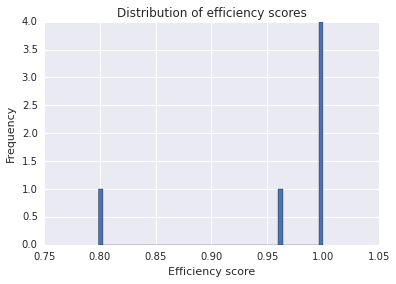

In [10]:
myresults['Efficiency'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Efficiency score')
plt.title('Distribution of efficiency scores')

## Correlation with environment variables

In [11]:
myresults.env_corr(env_vars)

A logit regression will be used. A censored regression with a Tobit model would be more correct but it is not yet provided by statsmodels.

Optimization terminated successfully.
         Current function value: 0.066162
         Iterations 9
        Logit Marginal Effects       
Dep. Variable:             Efficiency
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Funding       -0.0126      0.035     -0.359      0.719        -0.081     0.056
City_size  -1.696e-05   4.41e-05     -0.385      0.700        -0.000  6.94e-05
